In [19]:
import pandas as pd
renewable_data = pd.read_csv('/home/joseph/Downloads/Renewable.csv')
renewable_data_head = renewable_data.head()
renewable_data_info = renewable_data.info()
# Check basic info to see column types and any missing values
renewable_data_info
renewable_data_head,

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196776 entries, 0 to 196775
Data columns (total 17 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Time                    196776 non-null  object 
 1   Energy delta[Wh]        196776 non-null  int64  
 2   GHI                     196776 non-null  float64
 3   temp                    196776 non-null  float64
 4   pressure                196776 non-null  int64  
 5   humidity                196776 non-null  int64  
 6   wind_speed              196776 non-null  float64
 7   rain_1h                 196776 non-null  float64
 8   snow_1h                 196776 non-null  float64
 9   clouds_all              196776 non-null  int64  
 10  isSun                   196776 non-null  int64  
 11  sunlightTime            196776 non-null  int64  
 12  dayLength               196776 non-null  int64  
 13  SunlightTime/daylength  196776 non-null  float64
 14  weather_type        

(                  Time  Energy delta[Wh]  GHI  temp  pressure  humidity  \
 0  2017-01-01 00:00:00                 0  0.0   1.6      1021       100   
 1  2017-01-01 00:15:00                 0  0.0   1.6      1021       100   
 2  2017-01-01 00:30:00                 0  0.0   1.6      1021       100   
 3  2017-01-01 00:45:00                 0  0.0   1.6      1021       100   
 4  2017-01-01 01:00:00                 0  0.0   1.7      1020       100   
 
    wind_speed  rain_1h  snow_1h  clouds_all  isSun  sunlightTime  dayLength  \
 0         4.9      0.0      0.0         100      0             0        450   
 1         4.9      0.0      0.0         100      0             0        450   
 2         4.9      0.0      0.0         100      0             0        450   
 3         4.9      0.0      0.0         100      0             0        450   
 4         5.2      0.0      0.0         100      0             0        450   
 
    SunlightTime/daylength  weather_type  hour  month  
 0  

In [21]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, OrdinalEncoder
renewable_data['Time'] = pd.to_datetime(renewable_data['Time'])#
renewable_data_cleaned = renewable_data.drop_duplicates()
renewable_data_cleaned['Energy delta[Wh]'] = renewable_data_cleaned['Energy delta[Wh]'].clip(upper=5020)
renewable_data_cleaned['GHI'] = renewable_data_cleaned['GHI'].clip(upper=229.2)
renewable_data_cleaned['temp'] = renewable_data_cleaned['temp'].clip(lower=-16.6, upper=35.8)
scaler = MinMaxScaler()
columns_to_scale = ['Energy delta[Wh]', 'GHI', 'temp', 'wind_speed', 'humidity']
renewable_data_cleaned[columns_to_scale] = scaler.fit_transform(renewable_data_cleaned[columns_to_scale])
renewable_data_cleaned['day_of_week'] = renewable_data_cleaned['Time'].dt.dayofweek
renewable_data_cleaned['hour_of_day'] = renewable_data_cleaned['Time'].dt.hour
renewable_data_cleaned['season'] = renewable_data_cleaned['month'].apply(lambda x: (x%12 + 3)//3)
renewable_data['Time'] = pd.to_datetime(renewable_data['Time'])
renewable_data_cleaned = renewable_data.drop_duplicates()
# Handling outliers by capping extreme values (for Energy delta[Wh], GHI, and temp)
renewable_data_cleaned['Energy delta[Wh]'] = renewable_data_cleaned['Energy delta[Wh]'].clip(upper=5020)
renewable_data_cleaned['GHI'] = renewable_data_cleaned['GHI'].clip(upper=229.2)
renewable_data_cleaned['temp'] = renewable_data_cleaned['temp'].clip(lower=-16.6, upper=35.8)
scaler = MinMaxScaler()
columns_to_scale = ['Energy delta[Wh]', 'GHI', 'temp', 'wind_speed', 'humidity']
renewable_data_cleaned[columns_to_scale] = scaler.fit_transform(renewable_data_cleaned[columns_to_scale])
ordinal_encoder = OrdinalEncoder()
renewable_data_cleaned['weather_type'] = ordinal_encoder.fit_transform(renewable_data_cleaned[['weather_type']])
renewable_data_cleaned['day_of_week'] = renewable_data_cleaned['Time'].dt.dayofweek
renewable_data_cleaned['hour_of_day'] = renewable_data_cleaned['Time'].dt.hour
renewable_data_cleaned['season'] = renewable_data_cleaned['month'].apply(lambda x: (x%12 + 3)//3)
renewable_data_cleaned['lag_1'] = renewable_data_cleaned['Energy delta[Wh]'].shift(1)
renewable_data_cleaned['lag_2'] = renewable_data_cleaned['Energy delta[Wh]'].shift(2)
renewable_data_cleaned['rolling_mean_24'] = renewable_data_cleaned['Energy delta[Wh]'].rolling(window=24).mean()
renewable_data_cleaned = renewable_data_cleaned.dropna()
renewable_data_cleaned.head(), renewable_data_cleaned.info()



<class 'pandas.core.frame.DataFrame'>
Int64Index: 196753 entries, 23 to 196775
Data columns (total 23 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   Time                    196753 non-null  datetime64[ns]
 1   Energy delta[Wh]        196753 non-null  float64       
 2   GHI                     196753 non-null  float64       
 3   temp                    196753 non-null  float64       
 4   pressure                196753 non-null  int64         
 5   humidity                196753 non-null  float64       
 6   wind_speed              196753 non-null  float64       
 7   rain_1h                 196753 non-null  float64       
 8   snow_1h                 196753 non-null  float64       
 9   clouds_all              196753 non-null  int64         
 10  isSun                   196753 non-null  int64         
 11  sunlightTime            196753 non-null  int64         
 12  dayLength               19675

(                  Time  Energy delta[Wh]  GHI      temp  pressure  humidity  \
 23 2017-01-01 05:45:00               0.0  0.0  0.366412      1017       1.0   
 24 2017-01-01 06:00:00               0.0  0.0  0.370229      1017       1.0   
 25 2017-01-01 06:15:00               0.0  0.0  0.370229      1017       1.0   
 26 2017-01-01 06:30:00               0.0  0.0  0.370229      1017       1.0   
 27 2017-01-01 06:45:00               0.0  0.0  0.370229      1017       1.0   
 
     wind_speed  rain_1h  snow_1h  clouds_all  ...  SunlightTime/daylength  \
 23    0.398601      0.0      0.0         100  ...                     0.0   
 24    0.419580      0.0      0.0         100  ...                     0.0   
 25    0.419580      0.0      0.0         100  ...                     0.0   
 26    0.419580      0.0      0.0         100  ...                     0.0   
 27    0.419580      0.0      0.0         100  ...                     0.0   
 
     weather_type  hour  month  day_of_week  hou

In [22]:
from sklearn.model_selection import train_test_split

# Define the features (X) and target (y)
X = renewable_data_cleaned.drop(columns=['Energy delta[Wh]', 'Time'])
y = renewable_data_cleaned['Energy delta[Wh]']

# Split the data into training and testing sets (80% for training and 20% for testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the sizes of the training and testing sets
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((157402, 21), (39351, 21), (157402,), (39351,))

In [6]:
X_train.head()

,GHI,temp,pressure,humidity,wind_speed,rain_1h,snow_1h,clouds_all,isSun,sunlightTime,...,SunlightTime/daylength,weather_type,hour,month,day_of_week,hour_of_day,season,lag_1,lag_2,rolling_mean_24
63165,0.000000,0.471374,1008,0.730769,0.426573,0.0,0.0,51,0,0,...,0.00,2.0,23,10,3,23,4,0.000000,0.000000,0.000000
53446,0.119983,0.784351,1012,0.564103,0.244755,0.0,0.0,98,1,900,...,0.91,3.0,17,7,0,17,3,0.080279,0.092629,0.394065
171901,0.000000,0.314885,1007,0.871795,0.286713,0.0,0.0,100,0,0,...,0.00,3.0,15,12,6,15,1,0.000000,0.000000,0.007263
53818,0.657068,0.763359,1013,0.410256,0.251748,0.0,0.0,21,1,705,...,0.72,1.0,14,7,4,14,3,0.500000,0.551594,0.599278
2177,0.000000,0.284351,1021,0.717949,0.272727,0.0,0.0,2,0,0,...,0.00,0.0,16,1,5,16,1,0.000000,0.000000,0.313803


In [23]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler
import tensorflow_probability as tfp
tfd = tfp.distributions
from sklearn.linear_model import BayesianRidge, QuantileRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C
from scipy.stats import norm
import warnings
warnings.filterwarnings('ignore')

# Set random seeds for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

In [24]:
# Ensure consistent datatypes by setting TensorFlow's default float type
tf.keras.backend.set_floatx('float32')

# Function to evaluate model performance
def evaluate_model(y_true, y_pred, model_name):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)

    print(f"{model_name} Performance:")
    print(f"MSE: {mse:.4f}")
    print(f"RMSE: {rmse:.4f}")
    print(f"MAE: {mae:.4f}")
    print(f"R²: {r2:.4f}")
    print("-" * 40)

    return {'mse': mse, 'rmse': rmse, 'mae': mae, 'r2': r2}

# Using the X_train, X_test, y_train, y_test from the main code
# Scale the data for neural network models
X_scaler = StandardScaler()
X_train_scaled = X_scaler.fit_transform(X_train).astype(np.float32)
X_test_scaled = X_scaler.transform(X_test).astype(np.float32)

y_scaler = StandardScaler()
y_train_scaled = y_scaler.fit_transform(y_train.values.reshape(-1, 1)).flatten().astype(np.float32)
y_test_scaled = y_scaler.transform(y_test.values.reshape(-1, 1)).flatten().astype(np.float32)

# Convert to TensorFlow datasets
batch_size = 64
train_dataset = tf.data.Dataset.from_tensor_slices((X_train_scaled, y_train_scaled))
train_dataset = train_dataset.shuffle(buffer_size=1024).batch(batch_size)

test_dataset = tf.data.Dataset.from_tensor_slices((X_test_scaled, y_test_scaled))
test_dataset = test_dataset.batch(batch_size)

print(f"Data shapes - X_train: {X_train.shape}, X_test: {X_test.shape}, y_train: {y_train.shape}, y_test: {y_test.shape}")

Data shapes - X_train: (157402, 21), X_test: (39351, 21), y_train: (157402,), y_test: (39351,)


In [25]:
class WGAN_GP:
    def __init__(self, input_dim, latent_dim=100, gp_weight=10.0):
        self.input_dim = input_dim
        self.latent_dim = latent_dim
        self.gp_weight = gp_weight
        self.generator = self.build_generator()
        self.discriminator = self.build_discriminator()
        self.generator_optimizer = keras.optimizers.Adam(0.00005, beta_1=0.5, beta_2=0.9)
        self.discriminator_optimizer = keras.optimizers.Adam(0.00005, beta_1=0.5, beta_2=0.9)

    def build_generator(self):
        noise_input = keras.Input(shape=(self.latent_dim,))
        cond_input = keras.Input(shape=(self.input_dim,))

        # Process conditional input
        c = layers.Dense(64)(cond_input)
        c = layers.LeakyReLU(0.2)(c)
        c = layers.BatchNormalization()(c)

        # Process noise
        z = layers.Dense(64)(noise_input)
        z = layers.LeakyReLU(0.2)(z)
        z = layers.BatchNormalization()(z)

        # Merge inputs
        merged = layers.Concatenate()([z, c])

        # Generator network with residual connections
        x = layers.Dense(128)(merged)
        x = layers.LeakyReLU(0.2)(x)
        x = layers.BatchNormalization()(x)

        # Residual block 1
        res = x
        x = layers.Dense(128)(x)
        x = layers.LeakyReLU(0.2)(x)
        x = layers.BatchNormalization()(x)
        x = layers.Dense(128)(x)
        x = layers.LeakyReLU(0.2)(x)
        x = layers.BatchNormalization()(x)
        x = layers.Add()([x, res])

        x = layers.Dense(64)(x)
        x = layers.LeakyReLU(0.2)(x)
        x = layers.BatchNormalization()(x)

        # Output layer - prediction
        output = layers.Dense(1, activation='linear')(x)

        model = keras.Model([noise_input, cond_input], output, name="generator")
        return model

    def build_discriminator(self):
        energy_input = keras.Input(shape=(1,))
        cond_input = keras.Input(shape=(self.input_dim,))

        # Process conditional input
        c = layers.Dense(64)(cond_input)
        c = layers.LeakyReLU(0.2)(c)

        # Process energy value
        e = layers.Dense(32)(energy_input)
        e = layers.LeakyReLU(0.2)(e)

        # Merge inputs
        merged = layers.Concatenate()([e, c])

        x = layers.Dense(128)(merged)
        x = layers.LeakyReLU(0.2)(x)
        x = layers.Dropout(0.3)(x)

        x = layers.Dense(128)(x)
        x = layers.LeakyReLU(0.2)(x)
        x = layers.Dropout(0.3)(x)

        # No sigmoid for Wasserstein - output raw score
        validity = layers.Dense(1)(x)

        model = keras.Model([energy_input, cond_input], validity, name="discriminator")
        return model

    # Gradient penalty function
    def gradient_penalty(self, real_samples, fake_samples, cond_input):
        batch_size = tf.shape(real_samples)[0]
        alpha = tf.random.uniform(shape=[batch_size, 1], minval=0.0, maxval=1.0)

        # Interpolation between real and fake
        interpolates = alpha * real_samples + (1 - alpha) * fake_samples

        with tf.GradientTape() as gp_tape:
            gp_tape.watch(interpolates)
            pred = self.discriminator([interpolates, cond_input])

        grads = gp_tape.gradient(pred, interpolates)
        grad_norm = tf.sqrt(tf.reduce_sum(tf.square(grads), axis=1) + 1e-8)
        return tf.reduce_mean((grad_norm - 1.0) ** 2)

    @tf.function
    def train_step_discriminator(self, real_energy, real_conditions):
        batch_size = tf.shape(real_energy)[0]

        # Generate random noise
        noise = tf.random.normal([batch_size, self.latent_dim])

        # Generate fake energy predictions
        fake_energy = self.generator([noise, real_conditions])

        with tf.GradientTape() as disc_tape:
            # Get critic scores
            real_output = self.discriminator([real_energy, real_conditions])
            fake_output = self.discriminator([fake_energy, real_conditions])
            disc_loss = tf.reduce_mean(fake_output) - tf.reduce_mean(real_output)

            # Calculate gradient penalty
            gp = self.gradient_penalty(real_energy, fake_energy, real_conditions)

            # Add gradient penalty to loss
            disc_loss += self.gp_weight * gp

        # Get gradients
        disc_gradients = disc_tape.gradient(disc_loss, self.discriminator.trainable_variables)

        # Apply gradients
        self.discriminator_optimizer.apply_gradients(
            zip(disc_gradients, self.discriminator.trainable_variables)
        )

        return disc_loss

    @tf.function
    def train_step_generator(self, real_conditions):
        batch_size = tf.shape(real_conditions)[0]

        # Generate random noise
        noise = tf.random.normal([batch_size, self.latent_dim])

        with tf.GradientTape() as gen_tape:
            # Generate fake energy predictions
            fake_energy = self.generator([noise, real_conditions])

            # Get critic score on fake data
            fake_output = self.discriminator([fake_energy, real_conditions])

            # Calculate generator loss
            gen_loss = -tf.reduce_mean(fake_output)

        # Get gradients
        gen_gradients = gen_tape.gradient(gen_loss, self.generator.trainable_variables)

        # Apply gradients
        self.generator_optimizer.apply_gradients(
            zip(gen_gradients, self.generator.trainable_variables)
        )

        return gen_loss

    def train(self, X_train, y_train, epochs=100, batch_size=64, n_critic=5):
        """Train the WGAN-GP model"""
        # Convert inputs to tensors
        X_train = tf.convert_to_tensor(X_train, dtype=tf.float32)
        y_train = tf.convert_to_tensor(y_train.reshape(-1, 1), dtype=tf.float32)

        # Create dataset
        dataset = tf.data.Dataset.from_tensor_slices((y_train, X_train))
        dataset = dataset.shuffle(buffer_size=1000).batch(batch_size)

        d_losses = []
        g_losses = []

        for epoch in range(epochs):
            d_loss_epoch = []
            g_loss_epoch = []

            for batch_idx, (real_energy, real_conditions) in enumerate(dataset):
                # Train discriminator multiple times
                for _ in range(n_critic):
                    d_loss = self.train_step_discriminator(real_energy, real_conditions)
                    d_loss_epoch.append(d_loss)

                # Train generator once
                g_loss = self.train_step_generator(real_conditions)
                g_loss_epoch.append(g_loss)

            # Average losses
            avg_d_loss = tf.reduce_mean(d_loss_epoch)
            avg_g_loss = tf.reduce_mean(g_loss_epoch)

            d_losses.append(avg_d_loss)
            g_losses.append(avg_g_loss)

            # Print progress
            if epoch % 5 == 0:
                print(f"Epoch {epoch}/{epochs} [D loss: {avg_d_loss:.4f}] [G loss: {avg_g_loss:.4f}]")

        # Plot training curves
        plt.figure(figsize=(10, 6))
        plt.plot(d_losses, label='Critic Loss')
        plt.plot(g_losses, label='Generator Loss')
        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        plt.legend() 
        plt.title('CWGAN-GP Training History')
        plt.tight_layout()

        return d_losses, g_losses

    def predict(self, X_test, num_samples=1000):
        """Generate predictions by averaging multiple samples"""
        X_test = tf.convert_to_tensor(X_test, dtype=tf.float32)
        predictions = []

        for _ in range(num_samples):
            noise = tf.random.normal([X_test.shape[0], self.latent_dim])
            pred = self.generator.predict([noise, X_test], verbose=0)
            predictions.append(pred)

        # Stack predictions and compute mean and std
        stacked_preds = np.hstack(predictions)
        avg_predictions = np.mean(stacked_preds, axis=1)
        std_predictions = np.std(stacked_preds, axis=1)

        return avg_predictions, std_predictions


### MIXTURE DENSITY NETWORK (MDN) IMPLEMENTATION


In [26]:
class MDN(keras.Model):
    def __init__(self, n_components=5, input_dim=None):
        super(MDN, self).__init__()
        self.n_components = n_components
        self.input_dim = input_dim

        # Define the model architecture
        self.dense1 = layers.Dense(128, activation='relu')
        self.dropout1 = layers.Dropout(0.2)
        self.dense2 = layers.Dense(64, activation='relu')
        self.dropout2 = layers.Dropout(0.2)
        self.dense3 = layers.Dense(32, activation='relu')

        # Output layers for mixture model
        self.pi = layers.Dense(n_components, activation='softmax')  # Mixture weights
        self.mu = layers.Dense(n_components)  # Means
        self.sigma = layers.Dense(n_components, activation='softplus')  # Standard deviations

    def call(self, inputs):
        # Ensure input is correct dtype
        inputs = tf.cast(inputs, tf.float32)

        x = self.dense1(inputs)
        x = self.dropout1(x)
        x = self.dense2(x)
        x = self.dropout2(x)
        x = self.dense3(x)

        pi = self.pi(x)
        mu = self.mu(x)
        sigma = self.sigma(x) + 1e-5  # Add small constant for numerical stability

        return pi, mu, sigma

    def loss_function(self, y_true, pi, mu, sigma):
        # Ensure consistent dtypes
        y_true = tf.cast(y_true, tf.float32)
        pi = tf.cast(pi, tf.float32)
        mu = tf.cast(mu, tf.float32)
        sigma = tf.cast(sigma, tf.float32)

        # Build mixture of Gaussians using TFP
        mix = tfd.Categorical(probs=pi)
        comp = tfd.Normal(loc=mu, scale=sigma)
        mixture = tfd.MixtureSameFamily(mixture_distribution=mix, components_distribution=comp)

        # Calculate negative log likelihood
        log_likelihood = mixture.log_prob(y_true[:, tf.newaxis])
        return -tf.reduce_mean(log_likelihood)

    def sample(self, X, num_samples=1):
        # Ensure input is correct dtype
        X = tf.cast(X, tf.float32)

        # Get distribution parameters
        pi, mu, sigma = self(X)

        # Create mixture model
        mix = tfd.Categorical(probs=pi)
        comp = tfd.Normal(loc=mu, scale=sigma)
        mixture = tfd.MixtureSameFamily(mixture_distribution=mix, components_distribution=comp)

        # Sample from the mixture
        samples = mixture.sample(num_samples)

        # Take mean across samples for point predictions
        mean_samples = tf.reduce_mean(samples, axis=0)
        return mean_samples.numpy()

# -------------------------------------------------------------------------
# MDN TRAINING IMPLEMENTATION
# -------------------------------------------------------------------------
def create_and_train_mdn(X_train_scaled, y_train_scaled, X_test_scaled, epochs=20):
    try:
        input_dim = X_train_scaled.shape[1]
        mdn_model = MDN(n_components=5, input_dim=input_dim)

        # Optimizer
        optimizer = keras.optimizers.Adam(learning_rate=0.001)

        # Training step
        @tf.function
        def train_step(X, y):
            with tf.GradientTape() as tape:
                pi, mu, sigma = mdn_model(X)
                loss = mdn_model.loss_function(y, pi, mu, sigma)

            gradients = tape.gradient(loss, mdn_model.trainable_variables)
            optimizer.apply_gradients(zip(gradients, mdn_model.trainable_variables))
            return loss

        # Training loop
        losses = []
        val_losses = []

        for epoch in range(epochs):
            # Training
            epoch_loss = tf.keras.metrics.Mean()
            for X_batch, y_batch in train_dataset:
                loss = train_step(X_batch, y_batch)
                epoch_loss.update_state(loss)

            # Validation
            val_loss = tf.keras.metrics.Mean()
            for X_val, y_val in test_dataset:
                pi, mu, sigma = mdn_model(X_val)
                val_batch_loss = mdn_model.loss_function(y_val, pi, mu, sigma)
                val_loss.update_state(val_batch_loss)

            losses.append(epoch_loss.result().numpy())
            val_losses.append(val_loss.result().numpy())

            print(f"Epoch {epoch+1}/{epochs}, Loss: {epoch_loss.result():.4f}, Val Loss: {val_loss.result():.4f}")

            # Early stopping
            if epoch > 5 and val_losses[-1] > val_losses[-2] > val_losses[-3]:
                print("Early stopping triggered")
                break

        # Generate predictions
        y_pred_mdn = mdn_model.sample(X_test_scaled)
        y_pred_mdn_orig = y_scaler.inverse_transform(y_pred_mdn.reshape(-1, 1)).flatten()

        # Plot training history
        plt.figure(figsize=(10, 6))
        plt.plot(losses, label='Training Loss')
        plt.plot(val_losses, label='Validation Loss')
        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        plt.title('MDN Training History')
        plt.legend()
        plt.tight_layout()

        return mdn_model, y_pred_mdn_orig

    except Exception as e:
        print(f"Error in MDN training: {e}")
        # Return fallback predictions
        return None, np.full(y_test.shape, y_train.mean())


#### WGAN-GP TRAINING IMPLEMENTATION


In [27]:
def create_and_train_wgan(X_train_scaled, y_train_scaled, X_test_scaled, epochs=100):
    try:
        # Initialize WGAN-GP
        input_dim = X_train_scaled.shape[1]
        wgan_model = WGAN_GP(input_dim=input_dim, latent_dim=100)

        # Train model
        print("Training CWGAN model...")
        wgan_model.train(X_train_scaled, y_train_scaled, epochs=epochs, batch_size=64, n_critic=5)

        # Generate predictions with uncertainty
        y_pred_wgan, y_std_wgan = wgan_model.predict(X_test_scaled, num_samples=1000)

        # Convert back to original scale
        y_pred_wgan_orig = y_scaler.inverse_transform(y_pred_wgan.reshape(-1, 1)).flatten()
        y_std_wgan_orig = y_std_wgan * y_scaler.scale_

        # Plot predictions with uncertainty
        sample_size = min(200, len(y_test))
        plt.figure(figsize=(12, 6))
        plt.plot(range(sample_size), y_test[:sample_size], 'k-', label='Actual')
        plt.plot(range(sample_size), y_pred_wgan_orig[:sample_size], 'r-', label='WGAN Prediction')
        plt.fill_between(
            range(sample_size),
            y_pred_wgan_orig[:sample_size] - 1.96 * y_std_wgan_orig[:sample_size],
            y_pred_wgan_orig[:sample_size] + 1.96 * y_std_wgan_orig[:sample_size],
            alpha=0.3, color='red',
            label='95% Confidence Interval'
        )
        plt.legend()
        plt.title('CWGAN: Predictions with Uncertainty')
        plt.xlabel('Sample Index')
        plt.ylabel('Energy (Wh)')
        plt.tight_layout()

        return wgan_model, y_pred_wgan_orig, y_std_wgan_orig

    except Exception as e:
        print(f"Error in WGAN training: {e}")
        # Return fallback predictions
        return None, np.full(y_test.shape, y_train.mean()), np.zeros(y_test.shape)

### GAUSSIAN PROCESS REGRESSOR IMPLEMENTATION

In [28]:
def create_and_train_gp(X_train, y_train, X_test):
    """Create and train a Gaussian Process model"""
    try:
        # Use a subset of data for GP to avoid computational issues
        max_samples = 1000  # GP doesn't scale well to large datasets
        if X_train.shape[0] > max_samples:
            print(f"Using {max_samples} samples for GP training (GP doesn't scale well)")
            indices = np.random.choice(X_train.shape[0], max_samples, replace=False)
            X_train_subset = X_train.iloc[indices]
            y_train_subset = y_train.iloc[indices]
        else:
            X_train_subset = X_train
            y_train_subset = y_train

        # Define kernel
        kernel = C(1.0, (1e-3, 1e3)) * RBF(10, (1e-2, 1e2))

        # Initialize GP regressor
        gp = GaussianProcessRegressor(
            kernel=kernel,
            alpha=0.1,  # Noise variance
            normalize_y=True,  # Normalize target values
            n_restarts_optimizer=5  # Number of optimizer restarts
        )

        # Train model
        print("Training Gaussian Process model...")
        gp.fit(X_train_subset, y_train_subset)

        # Generate predictions with uncertainty
        y_pred_gp, y_std_gp = gp.predict(X_test, return_std=True)

        # Plot predictions with uncertainty
        sample_size = min(200, len(y_test))
        plt.figure(figsize=(12, 6))
        plt.plot(range(sample_size), y_test[:sample_size], 'k-', label='Actual')
        plt.plot(range(sample_size), y_pred_gp[:sample_size], 'm-', label='GP Prediction')
        plt.fill_between(
            range(sample_size),
            y_pred_gp[:sample_size] - 1.96 * y_std_gp[:sample_size],
            y_pred_gp[:sample_size] + 1.96 * y_std_gp[:sample_size],
            alpha=0.3, color='magenta',
            label='95% Confidence Interval'
        )
        plt.legend()
        plt.title('Gaussian Process: Predictions with Uncertainty')
        plt.xlabel('Sample Index')
        plt.ylabel('Energy (Wh)')
        plt.tight_layout()

        return gp, y_pred_gp, y_std_gp

    except Exception as e:
        print(f"Error in GP training: {e}")
        # Return fallback predictions
        return None, np.full(y_test.shape, y_train.mean()), np.zeros(y_test.shape)


### QUANTILE REGRESSION IMPLEMENTATION


In [29]:
def create_and_train_qr(X_train, y_train, X_test):
    """Create and train Quantile Regression models"""
    try:
        quantiles = [0.1, 0.25, 0.5, 0.75, 0.9]
        qr_models = {}
        qr_predictions = {}

        for q in quantiles:
            print(f"Training Quantile Regression for q={q}")
            qr_models[q] = QuantileRegressor(
                quantile=q,
                alpha=0.1,  # L1 regularization
                solver='highs'  # More stable solver
            )
            qr_models[q].fit(X_train, y_train)
            qr_predictions[q] = qr_models[q].predict(X_test)

        # Plot prediction intervals
        sample_size = min(200, len(y_test))
        plt.figure(figsize=(12, 6))
        plt.plot(range(sample_size), y_test[:sample_size], 'k-', label='Actual')
        plt.plot(range(sample_size), qr_predictions[0.5][:sample_size], 'b-', label='Median (Q50)')
        plt.fill_between(
            range(sample_size),
            qr_predictions[0.1][:sample_size],
            qr_predictions[0.9][:sample_size],
            alpha=0.3, color='blue',
            label='80% Prediction Interval (Q10-Q90)'
        )
        plt.legend()
        plt.title('Quantile Regression: Prediction Intervals')
        plt.xlabel('Sample Index')
        plt.ylabel('Energy (Wh)')
        plt.tight_layout()

        # Calculate uncertainty as half the interval width
        qr_uncertainty = (qr_predictions[0.9] - qr_predictions[0.1]) / 2

        return qr_models, qr_predictions[0.5], qr_uncertainty

    except Exception as e:
        print(f"Error in QR training: {e}")
        # Return fallback predictions
        return None, np.full(y_test.shape, y_train.mean()), np.zeros(y_test.shape)


### BAYESIAN RIDGE REGRESSION IMPLEMENTATION


In [30]:
def create_and_train_br(X_train, y_train, X_test):
    """Create and train Bayesian Ridge Regression"""
    try:
        # Initialize model
        br = BayesianRidge(
            n_iter=300,
            alpha_1=1e-6,
            alpha_2=1e-6,
            lambda_1=1e-6,
            lambda_2=1e-6,
            compute_score=True
        )

        # Train model
        print("Training Bayesian Ridge Regression model...")
        br.fit(X_train, y_train)

        # Generate predictions with uncertainty
        y_pred_br, y_std_br = br.predict(X_test, return_std=True)

        # Plot predictions with uncertainty
        sample_size = min(200, len(y_test))
        plt.figure(figsize=(12, 6))
        plt.plot(range(sample_size), y_test[:sample_size], 'k-', label='Actual')
        plt.plot(range(sample_size), y_pred_br[:sample_size], 'g-', label='Bayesian Ridge Prediction')
        plt.fill_between(
            range(sample_size),
            y_pred_br[:sample_size] - 1.96 * y_std_br[:sample_size],
            y_pred_br[:sample_size] + 1.96 * y_std_br[:sample_size],
            alpha=0.3, color='green',
            label='95% Confidence Interval'
        )
        plt.legend()
        plt.title('Bayesian Ridge Regression: Confidence Intervals')
        plt.xlabel('Sample Index')
        plt.ylabel('Energy (Wh)')
        plt.tight_layout()

        return br, y_pred_br, y_std_br

    except Exception as e:
        print(f"Error in BR training: {e}")
        # Return fallback predictions
        return None, np.full(y_test.shape, y_train.mean()), np.zeros(y_test.shape)

In [31]:
def plot_residuals_vs_uncertainty(y_test, predictions, uncertainties):
    """Plot residuals vs uncertainty with robust error handling"""
    plt.figure(figsize=(15, 10))

    for i, (model, pred) in enumerate(predictions.items()):
        if model in uncertainties:
            plt.subplot(2, 3, i+1)

            residuals = y_test - pred
            uncertainty = uncertainties[model]

            # Check for invalid values
            valid_indices = np.logical_and(
                np.isfinite(uncertainty),
                np.isfinite(residuals)
            )

            if not np.any(valid_indices):
                plt.text(0.5, 0.5, "Invalid data",
                         ha='center', va='center', transform=plt.gca().transAxes)
                plt.title(f"{model}\nNo valid data for analysis")
                continue

            valid_uncertainty = uncertainty[valid_indices]
            valid_residuals = residuals[valid_indices]

            # Check if we have any variance in the data
            if np.std(valid_uncertainty) < 1e-10:
                plt.text(0.5, 0.5, "No variance in uncertainty values",
                         ha='center', va='center', transform=plt.gca().transAxes)
                plt.title(f"{model}\nConstant uncertainty")
                continue

            # Plot the scatter with valid points only
            plt.scatter(valid_uncertainty, np.abs(valid_residuals), alpha=0.5, s=10)

            try:
                # Add trend line - with error handling
                z = np.polyfit(valid_uncertainty, np.abs(valid_residuals), 1)
                p = np.poly1d(z)

                # Sort for plotting
                sorted_uncertainty = np.sort(valid_uncertainty)
                plt.plot(sorted_uncertainty, p(sorted_uncertainty), "r--",
                         label=f"Trend: y={z[0]:.2f}x+{z[1]:.2f}")

                # Calculate correlation safely
                if len(valid_uncertainty) > 1:
                    corr = np.corrcoef(valid_uncertainty, np.abs(valid_residuals))[0, 1]
                    correlation_text = f"Correlation: {corr:.2f}"
                else:
                    correlation_text = "Insufficient data for correlation"
            except Exception as e:
                print(f"Error fitting trend line for {model}: {e}")
                correlation_text = "Trend fitting failed"

            plt.title(f"{model}\n{correlation_text}")
            plt.xlabel("Predicted Uncertainty")
            plt.ylabel("Absolute Error")
            if 'p' in locals():  # Only add legend if trend line was plotted
                plt.legend()
            plt.grid(True, alpha=0.3)

    plt.tight_layout()
    plt.savefig('uncertainty_vs_error.png')

In [ ]:
# -------------------------------------------------------------------------
# Main Execution - 
# -------------------------------------------------------------------------

In [ ]:
def run_uncertainty_models(X_train, y_train, X_test, y_test):
    """Run all uncertainty models and analyze results"""
    # Train and predict with Bayesian Ridge
    br_model, y_pred_br, y_std_br = create_and_train_br(X_train, y_train, X_test)

    # Train and predict with Gaussian Process
    gp_model, y_pred_gp, y_std_gp = create_and_train_gp(X_train, y_train, X_test)

    # Train and predict with Quantile Regression
    qr_models, y_pred_qr, y_uncertainty_qr = create_and_train_qr(X_train, y_train, X_test)

    # Train and predict with MDN
    mdn_model, y_pred_mdn = create_and_train_mdn(X_train_scaled, y_train_scaled, X_test_scaled)

    # Train and predict with WGAN-GP
    wgan_model, y_pred_wgan, y_std_wgan = create_and_train_wgan(X_train_scaled, y_train_scaled, X_test_scaled)

    # Collect all predictions and uncertainties
    predictions = {
        'BayesianRidge': y_pred_br,
        'GaussianProcess': y_pred_gp,
        'QuantileRegression': y_pred_qr,
        'MDN': y_pred_mdn,
        'WGAN': y_pred_wgan
    }

    uncertainties = {
        'BayesianRidge': y_std_br,
        'GaussianProcess': y_std_gp,
        'QuantileRegression': y_uncertainty_qr,
        'WGAN': y_std_wgan
    }

    # Evaluate individual models
    results = {}
    print("\n======== MODEL EVALUATIONS ========")
    for model_name, y_pred in predictions.items():
        metrics = evaluate_model(y_test, y_pred, model_name)
        results[model_name] = metrics

    # Summarize and output final recommendation
    print("\n======== FINAL MODEL RECOMMENDATION ========")

    # Print final scores
    print("\nModel Performance Metrics:")
    print(f"{'Model':<20} {'RMSE':<10} {'MAE':<10} {'R²':<10}")
    print("-" * 50)

    for model, metrics in results.items():
        print(f"{model:<20} {metrics['rmse']:.4f}{'':<5} {metrics['mae']:.4f}{'':<5} {metrics['r2']:.4f}")

    # Get best overall model based on RMSE
    best_model = min(results.items(), key=lambda x: x[1]['rmse'])[0]

    print(f"\nRECOMMENDED MODEL: {best_model}")
    print(f"This model provides the best RMSE performance of {results[best_model]['rmse']:.4f}")

    return {
        'predictions': predictions,
        'uncertainties': uncertainties,
        'metrics': results,
        'best_model': best_model
    }

# Call the main function if the script is run directly
if __name__ == "__main__":
    # Assuming X_train, y_train, X_test, y_test are already defined
    results = run_uncertainty_models(X_train, y_train, X_test, y_test)

    # Save results
    import pickle
    with open('uncertainty_modeling_results.pkl', 'wb') as f:
        pickle.dump(results, f)

    print("\nModel training and evaluation complete. Results saved to 'uncertainty_modeling_results.pkl'")

Error in BR training: __init__() got an unexpected keyword argument 'n_iter'
Using 1000 samples for GP training (GP doesn't scale well)
Training Gaussian Process model...
Training Quantile Regression for q=0.1
Training Quantile Regression for q=0.25
Training Quantile Regression for q=0.5
Training Quantile Regression for q=0.75
Training Quantile Regression for q=0.9


Models with predictions available: ['BayesianRidge', 'GaussianProcess', 'QuantileRegression', 'MDN', 'WGAN']
Models with uncertainties available: ['BayesianRidge', 'GaussianProcess', 'QuantileRegression', 'WGAN']

Evaluating all models with probabilistic metrics...

Evaluating BayesianRidge...
  Predictions dtype: float32, shape: (39351,), range: [0.1142, 0.1142]
  Uncertainties dtype: float32, shape: (39351,), range: [0.0000, 0.0000]
BayesianRidge Probabilistic Metrics:
  CRPS: 0.0000
  Pinball Loss: 0.0758
  Interval Coverage (50%): 0.0000
  Interval Coverage (90%): 0.0000
  Interval Coverage (95%): 0.0000

Evaluating GaussianProcess...
  Predictions dtype: float32, shape: (39351,), range: [-0.1350, 0.9768]
  Uncertainties dtype: float32, shape: (39351,), range: [0.0149, 0.1970]
GaussianProcess Probabilistic Metrics:
  CRPS: 0.0474
  Pinball Loss: 0.0252
  Interval Coverage (50%): 0.7459
  Interval Coverage (90%): 0.8545
  Interval Coverage (95%): 0.8758

Evaluating QuantileRegressio

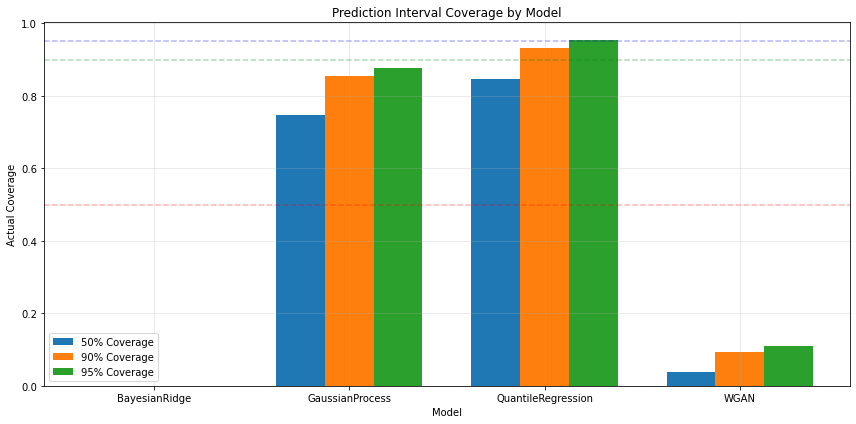

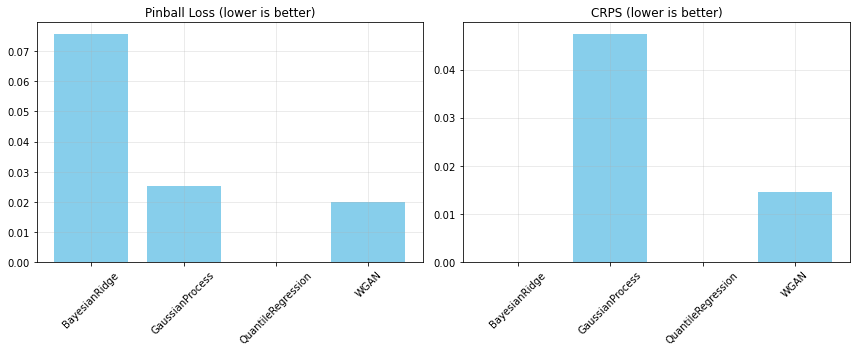

In [18]:
# Import the necessary modules
from probabilistic_metrics import (
    continuous_ranked_probability_score,
    pinball_loss,
    wasserstein_distance,
    interval_coverage,
    energy_score,
    generate_quantile_forecasts_from_gaussian,
    plot_reliability_diagram
)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

# Fix the dtype issue by creating a wrapper function for CRPS
def safe_crps(y_true, y_pred_mean, y_pred_std):
    """Safely calculate CRPS by ensuring consistent data types"""
    # Convert all to the same data type (float32)
    y_true = y_true.astype(np.float32)
    y_pred_mean = y_pred_mean.astype(np.float32)
    y_pred_std = y_pred_std.astype(np.float32)
    
    try:
        # Try with TensorFlow Probability
        import tensorflow_probability as tfp
        
        # Create a normal distribution for each prediction
        distributions = [tfp.distributions.Normal(loc=mu, scale=sigma) 
                        for mu, sigma in zip(y_pred_mean, y_pred_std)]
        
        crps_values = []
        for dist, actual in zip(distributions, y_true):
            # Generate CDF evaluation points centered on actual value
            eval_points = np.linspace(actual - 5 * dist.stddev(), actual + 5 * dist.stddev(), 100)
            
            # Calculate CDF values at evaluation points
            cdf_values = dist.cdf(eval_points).numpy()
            
            # Step function for actual value (1 if x >= actual, 0 otherwise)
            step_values = np.array([1.0 if x >= actual else 0.0 for x in eval_points])
            
            # Calculate CRPS as integral of squared difference
            squared_diff = (cdf_values - step_values) ** 2
            crps = np.trapz(squared_diff, eval_points)
            crps_values.append(crps)
        
        return np.mean(crps_values)
    
    except (TypeError, ValueError) as e:
        print(f"Error in CRPS calculation: {e}")
        print("Falling back to simplified CRPS calculation...")
        
        # Simplified CRPS calculation without TensorFlow Probability
        from scipy.stats import norm
        
        crps_values = []
        for mu, sigma, actual in zip(y_pred_mean, y_pred_std, y_true):
            # Skip invalid values
            if not np.isfinite(mu) or not np.isfinite(sigma) or not np.isfinite(actual) or sigma <= 0:
                continue
                
            # Generate evaluation points
            eval_points = np.linspace(actual - 5 * sigma, actual + 5 * sigma, 100)
            
            # Calculate CDF values using scipy
            cdf_values = norm.cdf(eval_points, loc=mu, scale=sigma)
            
            # Step function
            step_values = np.array([1.0 if x >= actual else 0.0 for x in eval_points])
            
            # CRPS calculation
            squared_diff = (cdf_values - step_values) ** 2
            crps = np.trapz(squared_diff, eval_points)
            crps_values.append(crps)
        
        if len(crps_values) > 0:
            return np.mean(crps_values)
        else:
            return np.nan

# Create a custom evaluation function that handles type inconsistencies
def evaluate_models_with_safe_metrics(predictions, uncertainties, y_test):
    """
    Evaluate models with proper type handling
    """
    # Convert y_test to numpy array if it's a pandas Series
    y_test_np = y_test.values if isinstance(y_test, pd.Series) else y_test
    
    results = {}
    
    for model_name, y_pred in predictions.items():
        if model_name in uncertainties:
            print(f"\nEvaluating {model_name}...")
            
            # Get the predictions and uncertainties
            y_pred = np.array(y_pred).flatten()
            y_std = np.array(uncertainties[model_name]).flatten()
            
            # Print data types and check for invalid values
            print(f"  Predictions dtype: {y_pred.dtype}, shape: {y_pred.shape}, range: [{np.min(y_pred):.4f}, {np.max(y_pred):.4f}]")
            print(f"  Uncertainties dtype: {y_std.dtype}, shape: {y_std.shape}, range: [{np.min(y_std):.4f}, {np.max(y_std):.4f}]")
            
            invalid_pred = np.sum(~np.isfinite(y_pred))
            invalid_std = np.sum(~np.isfinite(y_std))
            zero_std = np.sum(y_std == 0)
            
            if invalid_pred > 0 or invalid_std > 0 or zero_std > 0:
                print(f"  Warning: Found {invalid_pred} invalid predictions, {invalid_std} invalid uncertainties, {zero_std} zero uncertainties")
            
            # Calculate safe CRPS
            crps = safe_crps(y_test_np, y_pred, y_std)
            
            # Calculate Pinball Loss
            quantiles = [0.1, 0.25, 0.5, 0.75, 0.9]
            quantile_forecasts = {}
            for q in quantiles:
                # Handle potential NaN or inf in predictions or uncertainties
                valid_indices = np.logical_and(
                    np.logical_and(np.isfinite(y_pred), np.isfinite(y_std)), 
                    y_std > 0
                )
                
                if np.any(valid_indices):
                    # Only compute for valid values
                    from scipy.stats import norm
                    q_values = np.full_like(y_pred, np.nan)
                    q_values[valid_indices] = y_pred[valid_indices] + norm.ppf(q) * y_std[valid_indices]
                    quantile_forecasts[q] = q_values
                else:
                    # If no valid values, use the predictions as fallback
                    quantile_forecasts[q] = y_pred
            
            try:
                pinball = pinball_loss(y_test_np, quantile_forecasts, quantiles)
            except Exception as e:
                print(f"  Error in pinball loss calculation: {e}")
                pinball = np.nan
            
            # Calculate Interval Coverage
            coverage_50 = interval_coverage(y_test_np, y_pred, y_std, 0.5)
            coverage_90 = interval_coverage(y_test_np, y_pred, y_std, 0.9)
            coverage_95 = interval_coverage(y_test_np, y_pred, y_std, 0.95)
            
            # Compile metrics
            results[model_name] = {
                'CRPS': crps,
                'Pinball Loss': pinball,
                'Interval Coverage (50%)': coverage_50,
                'Interval Coverage (90%)': coverage_90,
                'Interval Coverage (95%)': coverage_95
            }
            
            # Print metrics
            print(f"{model_name} Probabilistic Metrics:")
            for metric_name, value in results[model_name].items():
                print(f"  {metric_name}: {value:.4f}")
    
    # Convert to DataFrame
    results_df = pd.DataFrame(results)
    
    # Print comparison
    print("\n===== PROBABILISTIC METRICS COMPARISON =====")
    print(results_df)
    
    # Save to CSV
    results_df.to_csv('probabilistic_metrics_comparison.csv')
    
    # Create comparison visualization
    if len(results) > 0:
        plot_model_comparison(results_df)
    
    return results_df

def plot_model_comparison(results_df):
    """Create visualization comparing models on probabilistic metrics"""
    # Plot interval coverage comparison
    plt.figure(figsize=(12, 6))
    
    models = results_df.columns
    x = np.arange(len(models))
    width = 0.25
    
    # Plot coverage metrics
    plt.bar(x - width, results_df.loc['Interval Coverage (50%)'], width=width, label='50% Coverage')
    plt.bar(x, results_df.loc['Interval Coverage (90%)'], width=width, label='90% Coverage')
    plt.bar(x + width, results_df.loc['Interval Coverage (95%)'], width=width, label='95% Coverage')
    
    # Add reference lines
    plt.axhline(0.5, color='r', linestyle='--', alpha=0.3)
    plt.axhline(0.9, color='g', linestyle='--', alpha=0.3)
    plt.axhline(0.95, color='b', linestyle='--', alpha=0.3)
    
    plt.xlabel('Model')
    plt.ylabel('Actual Coverage')
    plt.title('Prediction Interval Coverage by Model')
    plt.xticks(x, models)
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.savefig('model_coverage_comparison.png')
    
    # Plot error metrics
    plt.figure(figsize=(12, 5))
    
    # Only plot metrics that have valid values
    valid_metrics = ['Pinball Loss']
    if not np.isnan(results_df.loc['CRPS']).all():
        valid_metrics.append('CRPS')
    
    for i, metric in enumerate(valid_metrics):
        plt.subplot(1, len(valid_metrics), i+1)
        plt.bar(models, results_df.loc[metric], color='skyblue')
        plt.title(f'{metric} (lower is better)')
        plt.xticks(rotation=45)
        plt.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.savefig('model_error_metrics.png')

# Get your data directly from the results dictionary
predictions = results['predictions']
uncertainties = results['uncertainties']

# Make sure all values are numeric arrays
for model in predictions:
    predictions[model] = np.array(predictions[model]).astype(np.float32)
    
for model in uncertainties:
    uncertainties[model] = np.array(uncertainties[model]).astype(np.float32)

# Print what models are available for evaluation
print("Models with predictions available:", list(predictions.keys()))
print("Models with uncertainties available:", list(uncertainties.keys()))

# Run the evaluation with the safer function
print("\nEvaluating all models with probabilistic metrics...")
prob_metrics_df = evaluate_models_with_safe_metrics(predictions, uncertainties, y_test)

# Print final recommendations
try:
    print("\n===== FINAL MODEL RECOMMENDATIONS =====")
    print(f"Based on traditional metrics (RMSE): {results['best_model']}")

    # Find best models based on probabilistic metrics (handling NaN values)
    crps_values = prob_metrics_df.loc['CRPS']
    pinball_values = prob_metrics_df.loc['Pinball Loss']
    
    if not np.isnan(crps_values).all():
        best_crps = crps_values.dropna().idxmin() if not crps_values.dropna().empty else "N/A"
        print(f"Based on probabilistic accuracy (CRPS): {best_crps}")
    else:
        print("CRPS values are not available for comparison")
        
    if not np.isnan(pinball_values).all():
        best_pinball = pinball_values.dropna().idxmin() if not pinball_values.dropna().empty else "N/A"
        print(f"Based on interval quality (Pinball Loss): {best_pinball}")
    else:
        print("Pinball Loss values are not available for comparison")

    # Check interval coverage - find the model with coverage closest to the nominal levels
    coverage_errors = {}
    for model in prob_metrics_df.columns:
        if model in uncertainties:
            err_50 = abs(prob_metrics_df.loc['Interval Coverage (50%)'][model] - 0.5)
            err_90 = abs(prob_metrics_df.loc['Interval Coverage (90%)'][model] - 0.9)
            err_95 = abs(prob_metrics_df.loc['Interval Coverage (95%)'][model] - 0.95)
            coverage_errors[model] = (err_50 + err_90 + err_95) / 3

    if coverage_errors:
        best_calibrated = min(coverage_errors.items(), key=lambda x: x[1])[0]
        print(f"Best calibrated intervals: {best_calibrated}")
        
    # Save the comprehensive evaluation results
    import pickle
    with open('comprehensive_evaluation_results.pkl', 'wb') as f:
        pickle.dump({
            'traditional_metrics': results['metrics'],
            'probabilistic_metrics': prob_metrics_df
        }, f)

    print("\nComprehensive evaluation complete. Results saved to 'comprehensive_evaluation_results.pkl'")
    
except Exception as e:
    print(f"Error when generating final recommendations: {e}")
    import traceback
    traceback.print_exc()


